## Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import learning_curve  # For generating learning curves
import joblib

## Read IDS dataset

In [3]:
#cd "/scratch/project_2004883/Project 1/data/"

In [4]:
#ls

In [5]:
df = pd.read_csv('Multisine Waveforms.csv')

In [6]:
df.shape 

(750, 9)

In [7]:
df

,ID,Tx100RSSId10cm,Tx100RSSId15cm,Tx100RSSId20cm,Tx75RSSId10cm,Tx75RSSId15cm,Tx75RSSId20cm,Tones,Indicator
0,1,5.01,2.88,2.33,2.88,1.97,1.22,N2,0
1,2,5.01,3.03,2.22,2.88,1.74,1.22,N2,0
2,3,4.84,2.88,2.22,2.88,1.74,1.42,N2,0
3,4,5.01,3.03,2.08,3.03,2.08,1.42,N2,0
4,5,5.21,3.18,2.22,2.88,1.85,1.42,N2,0
...,...,...,...,...,...,...,...,...,...
745,746,0.91,0.46,0.24,0.37,0.37,0.13,N32,4
746,747,0.21,0.19,0.27,0.43,0.16,0.10,N32,4
747,748,0.31,0.24,0.16,0.12,0.10,0.22,N32,4
748,749,1.13,0.34,0.16,0.12,0.20,0.09,N32,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                750 non-null    int64  
 1   Tx100RSSId10cm    750 non-null    float64
 2   Tx100RSSId15cm    750 non-null    float64
 3    Tx100RSSId20cm   750 non-null    float64
 4   Tx75RSSId10cm     750 non-null    float64
 5   Tx75RSSId15cm     750 non-null    float64
 6    Tx75RSSId20cm    750 non-null    float64
 7   Tones             750 non-null    object 
 8   Indicator         750 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 52.9+ KB


In [9]:
df.Indicator.value_counts()

0    150
1    150
2    150
3    150
4    150
Name: Indicator, dtype: int64

In [10]:
df = df.drop(columns=['Tones'])

In [11]:
# Min-max normalization
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df = df.fillna(0)

In [12]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])

In [13]:
df

,ID,Tx100RSSId10cm,Tx100RSSId15cm,Tx100RSSId20cm,Tx75RSSId10cm,Tx75RSSId15cm,Tx75RSSId20cm,Indicator
0,0.000000,0.891344,0.900990,0.800000,0.863354,0.944724,0.733766,0
1,0.001335,0.891344,0.950495,0.760000,0.863354,0.829146,0.733766,0
2,0.002670,0.860037,0.900990,0.760000,0.863354,0.829146,0.863636,0
3,0.004005,0.891344,0.950495,0.709091,0.909938,1.000000,0.863636,0
4,0.005340,0.928177,1.000000,0.760000,0.863354,0.884422,0.863636,0
...,...,...,...,...,...,...,...,...
745,0.994660,0.136280,0.102310,0.040000,0.083851,0.140704,0.025974,4
746,0.995995,0.007366,0.013201,0.050909,0.102484,0.035176,0.006494,4
747,0.997330,0.025783,0.029703,0.010909,0.006211,0.005025,0.084416,4
748,0.998665,0.176796,0.062706,0.010909,0.006211,0.055276,0.000000,4


In [14]:
df.shape

(750, 8)

In [15]:
df.Indicator.value_counts()

0    150
1    150
2    150
3    150
4    150
Name: Indicator, dtype: int64

# Graphs

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

def learn_curve(X,y,c,m):
    
    le = preprocessing.LabelEncoder()
    sc = StandardScaler() 
    y = le.fit_transform(y)

    model = m

    lr = Pipeline(steps=(['scaler',sc], ['classifier',model]))
    
    cv = StratifiedKFold(n_splits=5,random_state=11,shuffle=True) 
    cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) 
    
    lr.fit(X,y) 

    train_score = lr.score(X,y) 
    
    train_size,train_scores,test_scores = learning_curve(estimator=lr,X=X,y=y,cv=cv,scoring="accuracy",random_state=11)
    train_scores = 1-np.mean(train_scores,axis=1) 
    test_scores = 1-np.mean(test_scores,axis=1) 
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    
    return {"cv_scores":cv_scores, "train_score":train_score, "learning_curve":lc}

In [28]:
def print_graph (lc):
  
    print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(lc["cv_scores"])}\n\n\
    Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(lc["cv_scores"])}\n\n\
    Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["cv_scores"])}\n\n\
    Training Accuracy:\n{"-"*15}\n{lc["train_score"]}\n\n')

    sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")
    plt.title("Learning Curve of a Good Fit Model")
    plt.ylabel("Misclassification Rate/Loss");

In [18]:
X = df.drop(['Indicator'],axis=1).values 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.5, test_size = 0.5, random_state = 0,stratify = y)

# LogisticRegressionGD

Accuracy of LogisticRegression: 0.992
Precision of LogisticRegression: 0.9923076923076923
Recall of LogisticRegression: 0.992
F1-score of LogisticRegression: 0.9919967987194878
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        75
           3       1.00      0.96      0.98        75
           4       0.96      1.00      0.98        75

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



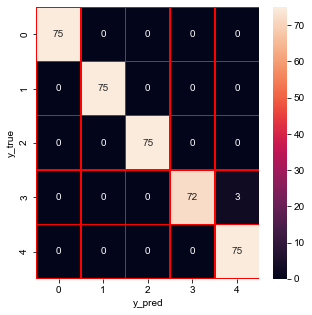

Accuracy of LogisticRegression: 0.992
Precision of LogisticRegression: 0.9923076923076923
Recall of LogisticRegression: 0.992
F1-score of LogisticRegression: 0.9919967987194878
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        75
           3       1.00      0.96      0.98        75
           4       0.96      1.00      0.98        75

    accuracy                           0.99       375
   macro avg       0.99      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375

Running time (training): 0.3115 seconds
Total prediction time: 0.0000 seconds
Average prediction time (per instance): 0.000047 seconds
Prediction times for each instance: [0.000997304916381836, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000997781753540039, 0.0, 0.0, 0.0, 0.0, 0.0

In [50]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, classification_report

# Start timer for running time (model training)
start_train_time = time.time()

# Model training
LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train)

LogisticRegression_score=LogisticRegression.score(X_test,y_test)

y_predict=LogisticRegression.predict(X_test)
y_true=y_test
print('Accuracy of LogisticRegression: '+ str(LogisticRegression_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of LogisticRegression: '+(str(precision)))
print('Recall of LogisticRegression: '+(str(recall)))
print('F1-score of LogisticRegression: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# End timer for running time (model training)
end_train_time = time.time()
running_time = end_train_time - start_train_time

# Measure total prediction time for all instances
start_predict_time = time.time()
y_predict = LogisticRegression.predict(X_test)
end_predict_time = time.time()
prediction_time = end_predict_time - start_predict_time

# Measure time taken for each individual prediction (prediction through time)
individual_prediction_times = []
for sample in X_test:
    start_time = time.time()
    LogisticRegression.predict([sample])  # Predicting a single sample, note the input must be 2D (list of list)
    end_time = time.time()
    individual_prediction_times.append(end_time - start_time)

# Model accuracy
LogisticRegression_score = LogisticRegression.score(X_test, y_test)
y_true = y_test

# Print metrics
print('Accuracy of LogisticRegression: ' + str(LogisticRegression_score))
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of LogisticRegression: ' + str(precision))
print('Recall of LogisticRegression: ' + str(recall))
print('F1-score of LogisticRegression: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Calculate average prediction time for each instance
average_prediction_time = sum(individual_prediction_times) / len(individual_prediction_times)

# Print timing results
print('Running time (training): {:.4f} seconds'.format(running_time))
print('Total prediction time: {:.4f} seconds'.format(prediction_time))
print('Average prediction time (per instance): {:.6f} seconds'.format(average_prediction_time))
print('Prediction times for each instance: {}'.format(individual_prediction_times))

In [51]:
joblib.dump(LogisticRegression, 'LogisticRegression.joblib')

['LogisticRegression.joblib']

<Figure size 432x288 with 0 Axes>

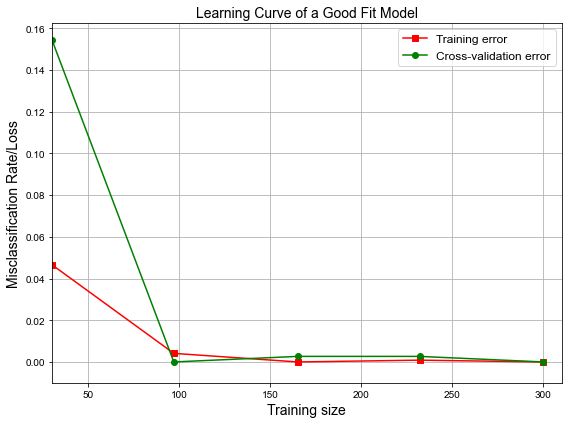

In [55]:
def print_graph(lc):
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    from matplotlib import rcParams

    # Set font style to sans-serif (e.g., Arial)
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Arial']

    # Extract learning curve data
    learning_curve_data = lc["learning_curve"]
    train_data = learning_curve_data[learning_curve_data["variable"] == "Training_loss"]
    val_data = learning_curve_data[learning_curve_data["variable"] == "Validation_loss"]

    # Plotting
    plt.figure(figsize=(8, 6))

    # Plot training and validation errors with red and green lines
    plt.plot(train_data["Training_size"], train_data["value"], 'r-s', label='Training error')
    plt.plot(val_data["Training_size"], val_data["value"], 'g-o', label='Cross-validation error')

    # Customize axis limits
    plt.ylim(-0.01, None)  # Ensure y-axis starts at 0.00
    plt.xlim(train_data["Training_size"].min(), 310)  # Extend x-axis to 310

    # Customize axis labels and title
    plt.xlabel('Training size', fontsize=14)
    plt.ylabel('Misclassification Rate/Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Learning Curve of a Good Fit Model', fontsize=14)
    plt.grid(True)

    # Display plot
    plt.tight_layout()
    plt.show()
    # Save the plot in different formats
# Save as vector graphics (PDF)
plt.savefig('LogisticRegression_learning_curve22.pdf', format='pdf', dpi=300)
# Save as vector graphics (EPS)
plt.savefig('LogisticRegression_learning_curve22.eps', format='eps', dpi=300)

# Save as vector graphics (SVG)
plt.savefig('LogisticRegression_learning_curve22.svg', format='svg')

# Save as raster graphics (PNG) with high resolution
plt.savefig('LogisticRegression_learning_curve22.png', format='png', dpi=300)


# Example of calling this function after generating `lc`
print_graph(lc)

In [53]:
# Save the plot in different formats
# Save as vector graphics (PDF)
plt.savefig('LogisticRegression_learning_curve22.pdf', format='pdf', dpi=300)
# Save as vector graphics (EPS)
plt.savefig('LogisticRegression_learning_curve22.eps', format='eps', dpi=300)

# Save as vector graphics (SVG)
plt.savefig('LogisticRegression_learning_curve22.svg', format='svg')

# Save as raster graphics (PNG) with high resolution
plt.savefig('LogisticRegression_learning_curve22.png', format='png', dpi=300)

<Figure size 432x288 with 0 Axes>

# Testing On Multisine_Waveforms_V2.csv (Unseen dataset) 

In [35]:
df_new = pd.read_csv('Multisine_Waveforms_V2.csv')

In [36]:
df_new

,ID,Tx90RSSId25cm,Tx90RSSId30cm,Tx90RSSId35cm,Tx65RSSId25cm,Tx65RSSId30cm,Tx65RSSId35cm,Indicator
0,1,1.37,0.70,0.78,0.82,0.60,0.52,0
1,2,1.37,0.74,0.78,0.91,0.63,0.56,0
2,3,1.27,0.91,0.86,0.95,0.67,0.49,0
3,4,1.37,1.01,0.82,1.01,0.67,0.49,0
4,5,1.42,0.91,0.86,0.82,0.70,0.49,0
...,...,...,...,...,...,...,...,...
745,746,0.12,0.21,0.26,0.09,0.12,0.13,4
746,747,0.13,0.10,0.10,0.20,0.19,0.09,4
747,748,0.12,0.12,0.12,0.26,0.09,0.09,4
748,749,0.15,0.13,0.12,0.10,0.09,0.10,4


In [37]:
# Min-max normalization
numeric_features = df_new.dtypes[df_new.dtypes != 'object'].index
df_new[numeric_features] = df_new[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df_new = df_new.fillna(0)

In [38]:
labelencoder = LabelEncoder()
df_new.iloc[:, -1] = labelencoder.fit_transform(df_new.iloc[:, -1])

In [39]:
# Assuming the last column is the label (y) and the rest are features (X)
X_new = df_new.drop('Indicator', axis=1)  # Replace 'label_column' with the actual column name for labels
y_new = df_new['Indicator']  # Replace 'label_column' with the actual column name for labels

print(X_new.head())  # Display the first few rows of features
print(y_new.head())  # Display the first few rows of labels

         ID  Tx90RSSId25cm   Tx90RSSId30cm    Tx90RSSId35cm   Tx65RSSId25cm   \
0  0.000000        0.831169        0.458647         0.750000        0.768421   
1  0.001335        0.831169        0.488722         0.750000        0.863158   
2  0.002670        0.766234        0.616541         0.836957        0.905263   
3  0.004005        0.831169        0.691729         0.793478        0.968421   
4  0.005340        0.863636        0.616541         0.836957        0.768421   

   Tx65RSSId30cm    Tx65RSSId35cm   
0        0.836066         0.796296  
1        0.885246         0.870370  
2        0.950820         0.740741  
3        0.950820         0.740741  
4        1.000000         0.740741  
0    0
1    0
2    0
3    0
4    0
Name: Indicator, dtype: int64


In [40]:
LogisticRegression_loaded = joblib.load('LogisticRegression.joblib')

In [41]:
df_new.Indicator.value_counts()

0    150
1    150
2    150
3    150
4    150
Name: Indicator, dtype: int64

In [42]:
# Predict on the entire new dataset
y_pred_new = LogisticRegression_loaded.predict(X_new)

In [43]:
# Predict on the entire new dataset
y_pred_new = LogisticRegression_loaded.predict(X_new)

Accuracy on new dataset: 0.8266666666666667
Precision on new dataset: 0.8719948247471184
Recall on new dataset: 0.8266666666666667
F1-score on new dataset: 0.8121561069150394
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150
           2       0.98      0.34      0.50       150
           3       0.55      0.79      0.65       150
           4       0.83      1.00      0.91       150

    accuracy                           0.83       750
   macro avg       0.87      0.83      0.81       750
weighted avg       0.87      0.83      0.81       750



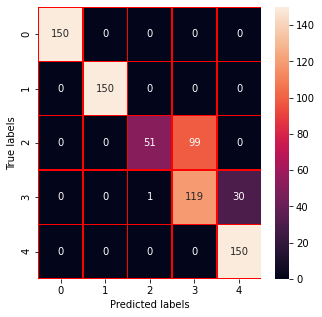

Total Prediction Time for the full dataset: 0.26360273361206055 seconds
Prediction Time per Attack: 0.00035 seconds


In [48]:
import time
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Start time for prediction (time taken for the model to predict on the new dataset)
start_prediction_time = time.time()

# Calculate accuracy
accuracy_new = accuracy_score(y_new, y_pred_new)
print("Accuracy on new dataset:", accuracy_new)

# Calculate precision, recall, and F1-score (weighted average)
precision, recall, fscore, _ = precision_recall_fscore_support(y_new, y_pred_new, average='weighted')
print('Precision on new dataset:', precision)
print('Recall on new dataset:', recall)
print('F1-score on new dataset:', fscore)

# Print classification report
print("Classification Report:\n", classification_report(y_new, y_pred_new))

# Confusion matrix
cm = confusion_matrix(y_new, y_pred_new)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# End time for prediction
prediction_time = time.time() - start_prediction_time
print("Total Prediction Time for the full dataset:", prediction_time, "seconds")

# Time per prediction (prediction per attack)
prediction_per_attack = prediction_time / len(y_new)
print(f"Prediction Time per Attack: {prediction_per_attack:.5f} seconds")